<center>

# Trabajo Práctico Final

## Procesamiento de señales biomédicas

### Primer Cuatrimestre 2024

</center>

**Docentes:**

- Roberto Sebastián Tomás
- Aylin Agatha Vazquez Chenlo
- Francisco Tassara
- Victoria Reppucci

**Alumnxs:**

- Bajlec, Ivo - 62175
- Grau, Gonzalo - 62259
- Pereira, Camila Noemi - 61574

### Objetivo del trabajo

El objetivo del presente trabajo es desarrollar un algoritmo, implementado los conocimientos obtenidos en las clases teóricas, que nos permita obtener una medida objetiva y estandarizada sobre la percepción sonora. Para realizar esto, el algoritmo que se desarrolló, se busco que sea capaz de procesar las información de los potenciales evocados auditivos, por medio de los cuatro tipos de promedios: homogéneo, inhomogéneo con amplitud variable, inhomogéneo con varianza variable e inhomogéneo con amplitud y varianza variable, y con la implementación de diferentes métodos como welch, interpretar esa información obtenida como un nivel de percepción sonora.

### Estado del arte 

Los potenciales evocados (PE) son pruebas diagnósticas que evalúan la integridad de las vías sensitivas a través de la estimulación sensorial, en este caso auditiva, y el registro de las respuestas cerebrales. Dichas respuestas, se registran mediante estímulos repetitivos y se promedian para mejorar la relación señal-ruido, permitiendo una evaluación más precisa de las vías neuronales estimuladas. [2]

**Tipos de potenciales evocados:**
1) Emisiones otoacústicas (OAE): este tipo de sonidos son emitidos por el oído interno, precisamente por las células ciliadas externas de la cóclea, como respuesta a un estímulo auditivo. Estas emisiones se utilizan para evaluar la función coclear, además de resultar útiles para la detección temprana de la pérdida auditiva. Métodos como las emisiones otoacústicas transitorias, que se basan en OAE, son utilizadas para estimar el crecimiento de la sonoridad.

2) Respuestas auditivas evocadas del tronco del encéfalo (ABR): este tipo de potenciales son generados por la actividad neural en el tronco del encéfalo en respuesta a estímulos auditivos. Los ABR reflejan la actividad neural desde el nervio auditivo hasta el tronco del encéfalo. Las grabaciones de ABR, se utilizan para evaluar la audición y la integridad de las vías auditivas centrales, siendo útiles para estimar el umbral auditivo y detectar problemas neurológicos que puedan afectar las vías auditivas. Otro método también utilizado es el de las ABR con explosiones de tonos (TBABR), que sirve para estimar el crecimiento de la sonoridad en relación con la intensidad del estímulo.

Para el siguiente trabajo, nos enfocaremos en el análisis de PE del tipo ABR, específicamente TBABR.

**Potencial evocado auditivo**

<center>

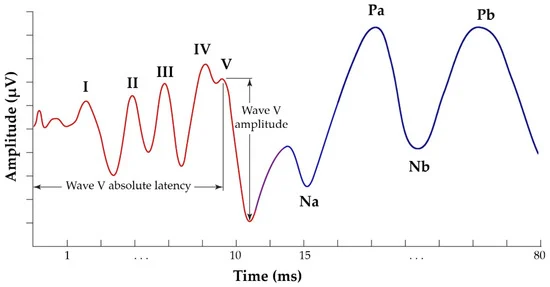

</center>

Los potenciales evocados auditivos (PEA) son registros de la actividad eléctrica que son generados por la estimulación sonora y que es recogida por los electrodos que se encuentran ubicados en la superficie de la cabeza. Esta actividad corresponde a la activación de las estructuras auditivas, y permite de esta manera conocer cómo se transmite el estímulo auditivo desde la cóclea hasta el córtex cerebral. Dos características importantes a mencionar, es que el estímulo es de tipo mecánico que se transforma en una señal eléctrica en el órgano de Corti y viaja a través de la vía auditiva hasta el córtex; y que el tiempo desde la estimulación del órgano Corti hasta la llegada de la información al córtex es de aproximadamente 300 ms, y esto  se conoce como latencia. [4]

Según el tiempo estudiado dentro de esta latencia, los PEA se pueden clasificar en: microfónicos cocleares, electrococleografía, PEA de tronco encefálico (PEATC), potenciales de estado estable, potenciales de latencia media y potenciales de latencia larga. Los PEATC son los más utilizados, estos tienen una latencia de 2-12 ms y se caracterizan por la existencia de 5 ondas principales:
- Onda I: proviene del ganglio espiral.
- Onda II: generada en el núcleo coclear.
- Onda III: asociada a los núcleos cocleares.
- Onda IV: originada en el complejo olivar superior.
- Onda V: proviene del lemnisco lateral y/o colículo inferior.

Estas ondas permiten conocer el tiempo de conducción periférico y central del estímulo auditivo. La conducción periférica es el tiempo que tarda el estímulo en pasar del oído externo y medio hasta el nervio auditivo (latencia de la onda I), y la central es el paso del estímulo por el tronco del encéfalo (la diferencia de latencia entre las ondas I y V).

**Importancia de la onda V**

Las razones por las que la onda V es significativa son las siguientes [5]:
- Diagnóstico cuantitativo: la identificación de la onda V es importante porque es la última en desaparecer y, además, es la más fácil de visualizar. El umbral audiológico se relaciona con la intensidad mínima en la que se puede identificar esta onda.
- Reclutamiento: en los casos de lesión coclear, la pendiente de la latencia de la onda V puede aumentar, indicando la condición de recrutamiento. 
- Asimetría auditiva y diagnóstico diferencial: la onda V resulta útil en la evaluación objetivo del grado de audición, principalmente en recién nacidos, niños, y casos donde exista asimetría auditiva o acúfenos unilaterales. 


**Modelado de los potenciales evocados**

La medición de una señal de potencial evocado es inherentemente ruidosa. Sin embargo, se puede eliminar gran parte de este ruido mediante la adecuada combinación de múltiples mediciones. Sea sea $s(t)$ la señal del PE que se desea medir, la cual asumimos idéntica en su morfología para todas las mediciones a igual estímulo, y sea la $x_{i}(t)$ la i-ésima medición (trial) obtenida. Luego, para mayor generalización, supongamos también que la amplitud con la que se presenta la señal $s(t)$ también puede variar entre trials, y llamemos $a_{i}$ a la amplitud del PE en $x_{i}$. Finalmente, sea $eta_{i}(t)$ el ruido presente en el i-ésimo trial. Se modela entonces a las lecturas de un experimento de medición de PE como:

\begin{equation}
x_{i}(t) = a_{i}s(t) + \eta_{i}(t)
\end{equation}

Sea $N$ el número total de trials que se midieron en el experimento. En términos vectoriales, sean $\mathbf{x}, \mathbf{s}, \mathbf{a}, \mathbf{\eta} \in \mathbb{R}^{NX1}$ tal que $\mathbf{x} = \begin{bmatrix} x_1 & x_2 & \dots x_N \end{bmatrix}^{T}$, $\mathbf{s} = \begin{bmatrix} s & s & \dots s \end{bmatrix}^{T}$, $\mathbf{a} = \begin{bmatrix} a_1 & a_2 & \dots a_N \end{bmatrix}^{T}$, y $\mathbf{\eta} = \begin{bmatrix} \eta_1 & \eta_2 & \dots \eta_N \end{bmatrix}^{T}$. A su vez, sea $\sigma_i$ la desviación estándar del ruido $\eta_i$, y sea $\mathbf{\sigma} = \begin{bmatrix} \sigma_1 & \sigma_2 & \dots \sigma_N \end{bmatrix}^T$. De esta manera, la ecuación anterior se puede representar como

\begin{equation}
\mathbf{x} = \mathbf{a}^T \mathbf{s} + \mathbf{\eta}
\end{equation}


**Reducción de ruido en mediciones de PE**

Una forma de extraer la señal $s(t)$ a partir de los trials $x_{i}(t)$ aumentando la relación señal/ruido (SNR) consiste en promediar las lecturas en forma ponderada. Es decir, se busca obtener una señal de la forma $\hat{s}(t) = \mathbf{w}^{T} \cdot \mathbf{x}(t)$ en donde la SNR de $\hat{s}(t)$ sea mínima, de modo tal que $\hat{s}(t) \approx s(t)$. Existen múltiples formas de hallar los pesos $\mathbf{w}$ óptimos para que la SNR del promediado $\mathbf{w}^{T} \cdot \mathbf{x}$ sea mínima, dependiendo de las condiciones que se asuman sobre $\mathbf{a}$ y $\mathbf{\sigma}$:

1. _Promediado homogéneo_: si se asume que tanto las amplitudes como las varianzas del ruido de cada trial son idénticas, los pesos que optimizan el promediado son simplemente $\mathbf{w} = \begin{bmatrix} \frac{1}{N} & \frac{1}{N} & \dots \frac{1}{N} \end{bmatrix}^{T} = \frac{1}{N} \mathbf{1}$, donde $\mathbf{1}  \in \mathbb{R}^{NX1}$
2. _Ponderado por amplitud_: si se asume que las varianzas $\sigma_{i}^2 = \sigma_{\eta}^2$ son idénticas $\forall i = 1, \dots, N$ pero las amplitudes varían, entonces los pesos óptimos tienen la forma $\mathbf{w} = \frac{\mathbf{a}}{\mathbf{a}^T \mathbf{a}}$
3. _Ponderado por varianza_: si se asume que las amplitudes $a_{i} = a_0$ son idénticas $\forall i = 1, \dots, N$ pero las varianzas $\sigma_{i}^2$ varían, entonces los pesos óptimos tienen la forma $\mathbf{w} = \frac{\mathbf{R_{\eta}}^{-1} \mathbf{1}}{\mathbf{1}^T \mathbf{R_{\eta}}^{-1} \mathbf{1}}$, donde $\mathbf{R_{\eta}}^{-1} = \mathbf{\sigma} \mathbf{\sigma}^T = diag(\sigma_{1}^2, \dots, \sigma_{N}^2)$ es la autocorrelación del ruido $\mathbf{\eta}$
4. _Ponderado por amplitud y varianza_: en el caso más general, donde tanto la varianza del ruido como la amplitud de la señal son en principio distintas para cada trial, los pesos óptimos son $\mathbf{w} = \frac{\mathbf{R_{\eta}}^{-1} \mathbf{a}}{\mathbf{a}^T \mathbf{R_{\eta}}^{-1} \mathbf{a}}$

Para estimar la amplitud de cada medición, se toma como estimador la proyección del trial en el promedio homogéneo del ensamble. Para estimar la varianza del ruido, se mide la varianza del trial en sus últimas $k$ muestras, donde se asume que $s \rightarrow 0$.

**Percepción sonora**

A la hora de evaluar integridad de las vías auditivas en un paciente, resulta vital contar con algún parámetro que permita estimar la percepción de la intensidad de sonido para distintos niveles de presión de aire (SPL) en dB. Esta relación no es necesariamente lineal, y puede variar entre sujetos. Se denomina _percecpción sonora_, _crecimiento de la sonoridad_, o _loudness growth_ (LG) a la función que representa qué tan fuerte una persona percibe un estímulo auditivo en función de su intensidad en SPL medida en dB. Uno de los primeros modelos para la LG en función de la intensidad es de la forma:

\begin{equation}
LG(i) = Ae^{bi}
\end{equation}

donde i es la intensidad del estímulo en SPL. Es decir: existiría una relación aproximadamente exponencial para la LG en función del SPL. 

**Estimación de la percepción sonora a partir de potenciales evocados**

Existen múltiples métodos para la estimación de la LG a partir de ABR, donde cada uno de estos busca asignar un valor real en unidades arbitrarias a la señal obtenida de TBABR. Algunas técnicas utilizadas son:
- Estimación por potencia: consiste en calcular la potencia total acumulada de la señal de potencial evocado $\hat{s}(t)$, calculada como la integral de la densidad espectal de potencial (PSD), y luego estimar la LG como su inverso. La hipótesis consiste en que la potencial total de la señal de PE disminuye a mayor intensidad en SPL del estímulo sonoro.
- Estimación por latencia de la onda 5: consiste en evaluar la latencia del quinto pico positivo de $\hat{s}(t)$, la cual se asume que es inversamente proporcional a la LG en función de los SPL en dB.


### Base de datos

Para realizar nuestro trabajo, la cátedra nos proporcionó una base de datos disponible en [3] , que fue creada y aportada por Michael J.Epstein e Ikaro Silva. La base fue generada como parte de un estudio sobre potenciales evocados y el crecimiento de la sonoridad, esta cuenta con dos conjuntos de señales fisiológicas: ABR y OAE que se registraron en conjunto en una cabina insonorizada y eléctricamente blindada, y dos conjuntos de estimaciones psicoacústicas de la sonoridad en función del nivel de presión sonora pico (peSPL).

Además de los datos sin procesar, se realizaron para cada nivel dos promedios ponderados de las grabaciones de ABR y OAE, el primero consistió en la media ponderada de todas las pruebas de la primera mitad y el segundo de todas las pruebas de la segunda mitad. Para cada frecuencia, el estímulo se presentó en forma creciente desde el umbral de oyente, que se determinó a partir del umbral máximo del procedimiento CMM o ME, hasta los 100 dB peSPL en pasos de 5 dB.

Los archivos para cada sujeto NX que se obtuvieron fueron los siguientes:

Datos promediados:
- Nx_evoked_avelevel_Ffreq_Rrep.dat: archivo binario con señales ABR y OAE.
- Nx_evoked_avelevel_Ffreq_Rrep.hea: archivo de encabezado con comentarios sobre sexo, oido presentado, edad del sujeto, numero de pruebas utilizadas en el prmedio, nivel de ruido residual estimado y relacion señal ruido ponderada estimada.
- Nx_LoudnessData_Ffreq.txt: mediciones de sonoridad en unidades logarítmicas obtenidas mediante procedimientos psicoacústicos.

Datos sin procesar: 
- Nx_evoked_rawlevel_Ffreq_Rrep.dat: archivo binario con señales ABR y OAE.
- Nx_evoked_rawlevel_Freq_ Rrep.hea: archivo de encabezado con comentarios sobre nivel de estímulo, frecuencia del estímulo, oído presentado, longitud de la prueba y condición.
- Nx_evoked_rawlevel_Ffreq_Rrep.trg: archivo binario de anotación que indica el inicio de la prueba con respecto al inicio del estímulo.

Aclaraciones: x representa el ID del oyente (1 al 8), level = peSPL del estímulo (Este es el que va aumentando desde el umbral hasta 100 dB en pasos de 5dB), freq = frecuencia del estímulo en kHz y rep = 1 o 2 indicando que promedio representa. Además, en el 20% de los casos, ocurrió que uno de los canales estaba severamente dañado por artefactos eléctricos y se lo eliminó de los archivos (los nombres de los archivos finalizar con _x).


### Materiales y métodos

Para el desarrollo de este trabajo, se hará uso de los siguientes módulos de código abierto:
- numpy
- matplotlib
- pandas
- scipy
- wfdb
- re

Además, se desarrollaron dos módulos propios que se encuentran disponibles en los archivos _data\_hea\_reader.py_ y _eeg\_avg.py_. En el caso de _data\_hea\_reader.py_, este archivo contiene funciones que permiten leer y procesar datos de señales EEG desde archivos que se encuentran en formato '.dat' y '.hea'. Y respecto al archivo _eeg\_avg.py_, este contiene funciones que permite simular y analizar potenciales evocados relacionados con eventos a partir de señales de EEG.

En base a nuestro objetivo, el procedimiento aplicado consiste de los siguientes pasos:

1) Lectura de los datos sin procesar del dataset
2) Promediado de los trials de iguales condiciones experimentales
3) Estimación de la LG mediante el análisis de los PE obtenidos por promediado


### Desarrollo

In [1]:
# imports necesarios
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import welch
from dat_hea_reader import *
from eeg_avg import *
import scipy.signal as sig
import os
from typing import List, Tuple, Dict
import re

#### Paso 1: lectura de datos

El primer pasa para el desarrollo de este trabajo consiste en leer las señales crudas y extraer los trials individuales. Como se mencionó anteriormente, cada archivo .dat cuenta con las señales de OAE y ABR de todos los trials a igual frecuencia e intensidad de estímulo para un mismo sujeto, todo en un mismo array. Por lo tanto, se debe en primera instancia extraer la señal de ABR, y luego segmentarla en trials de longitud conocida. A la hora de obtener los trials, se aplicó un umbral de amplitud para rechazar a aquellas realizaciones en las que, por un artefacto en la lectura, las mediciones de voltaje excedieron en valor absoluto una cota superior.

El archivo  _data\_hea\_reader.py_ es un módulo que incluye funciones que permiten la lectura y el procesamiento de  datos de señales EEG que se encuentran almacenados en formato .dat y .hea. Las funciones que presenta son dos: parse_comments() y read_trials(). La primera permite la conversión a un diccionario de los comentarios que estan presentes en los archivos '.hea', y la segunda permite que a partir de la lectura de los archivos '.dat' y'.hea', se extraigan las señales de EEG. Esta segunda funcion termina devolviendo la frecuencia de muestreo, una matriz de segmentos válidos, y el diccionario de comentarios porque utiliza la primera función mencionada.

In [2]:
def read_trials(filepath: str, threshold: int=50000) -> Tuple[int, np.ndarray, dict]:
    """
    Reads .dat and .hea files, and the

    Args:
        filepath (str): filepath WITHOUT the extension
        threshold (int): voltage threshold in nV to discard measuring artifacts

    Returns:
        Tuple[int, np.ndarray, dict]: sample frequency, trials matrix, comments dict
    """
    record = wfdb.rdrecord(filepath)
    fs = record.fs
    ABR_raw = record.p_signal[:, 0]
    comments = parse_comments(record.comments)
    tr_len = comments['Trial Length (samples)']
    sig_len = record.sig_len

    #create an empty list
    trials = []
    for i in range(0, sig_len - tr_len, tr_len):
        #separate a trial 
        trial = ABR_raw[i:i+tr_len]
        #check if the trial has some outlier data, if it does the trial is discarted
        if any(abs(point) > threshold for point in trial):
            continue
        else:
            trials.append(trial)
            
    if not trials:
            raise ValueError("Todos los trials estan fuera del limite, ende Trials esta vacia")
    
    trials = np.array(trials)

    return fs, trials, comments

_Ejemplo: lectura del archivo N1_evoked_raw_10_F1_R1_

In [3]:
path_realizacion = r'data_raw_N1\N1_evoked_raw_10_F1_R1'
fs, trials, comments = read_trials(path_realizacion)

print(f"{fs=} [Hz]")
comments

fs=48000 [Hz]


{'SPL': 10,
 'Stim Freq (kHz)': 1,
 'Ear': 'r',
 'Trial Length (samples)': 2002,
 'Condition': 'Normal'}

In [4]:
N, M = trials.shape
print(f"{N} trials de {M} muestras c/u leidos para el sujeto 1 estimulado con la freq. F1 con SPL=10 [dB]")

872 trials de 2002 muestras c/u leidos para el sujeto 1 estimulado con la freq. F1 con SPL=10 [dB]


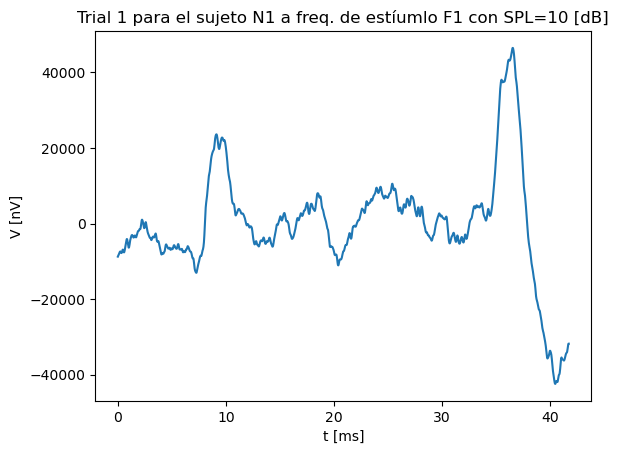

In [5]:
# Graficamos un trial
tr_len = comments['Trial Length (samples)']
t = np.linspace(0, tr_len/fs, tr_len)*1000 # convert to ms

plt.plot(t, trials[0, :])
plt.xlabel('t [ms]')
plt.ylabel('V [nV]')
plt.title('Trial 1 para el sujeto N1 a freq. de estíumlo F1 con SPL=10 [dB]')
plt.show()

#### Paso 2: promediado
El módulo _eeg\_avg.py_ incluye funciones que permiten la simulación y el análisis de señales de PE en EEG, de esta manera, facilita la comparación de diferentes métodos de promediado.

Se puede observar en este archivos tres funciones en total, dos de ellas funcionales y la tercera como prueba de las anteriores, estas funciones son: simulate_ERP(), average_EEG () y test().

La función simulate_ERP(), realiza una simulación de lectura ERP EEG donde la amplitud y/o la varianza resultan parametros variables segun el modo (homogéneo, inhomogéneo con amplitud variable, inhomogéneo con varianza variable e inhomogéneo con amplitud y varianza variable). De esta función se obtiene un arreglo de tiempo, una matriz de señales EEG, y la señal ERP promedio.

Con respecto a la función average_EEG(), esta ejecuta un promedio ponderado o no ponderado de una serie de señales ERP EEG, por lo tanto, termina devolviendo un arreglo con la señales promediadas.

Por ultimo, la función test() sirve como para probar simulando señales ERP y realizando los promedios en sus cuatro modos, y luego graficarlos.

In [6]:
def average_EEG(X: np.ndarray, mode: str='homgenous') -> np.ndarray:
    """
    Performs a weighted or unweighted average of series of ERP EEG signals

    Args:
        X (np.ndarray): NxM matrix where every row is a new experiment and every column is a new sample
        mode (str, optional): Indicates how to perform the average. Could be:
            - homogenous: simple, unweighted average
            - amp: weight by amplitude
            - var: weight by variance
            - both: weight by both amplitude and variance
        Defaults to 'homogenous'.

    Returns:
        np.ndarray: an Mx1 array with the averaged signals
    """
    VALID_MODE = {'homogenous', 'amp', 'var', 'both'}
    if mode not in {'homogenous', 'amp', 'var', 'both'}:
        raise ValueError(F"{mode} is not a valid mode. Should be: {''.join(VALID_MODE)}")

    elif mode == 'homogenous':
        return np.mean(X, axis=0)
    
    # Find amplitudes
    s = np.mean(X, axis = 0)
    a = X.dot(s.T)

    # Find variances
    M = X.shape[1]
    V = np.var(X[:, -int(0.4*M):], axis=1)

    # Get weights and average
    if mode == 'amp':
        w = a / np.sum(a**2)
    elif mode == 'var':
        w = (1/V) / (np.sum(1/V))
    elif mode == 'both':
        w = (a/V) / (np.sum(a**2/V))
    
    return w.T.dot(X/np.sum(w))

_Ejemplo: test de las funciones de promediado mediante potenciales sintéticos_

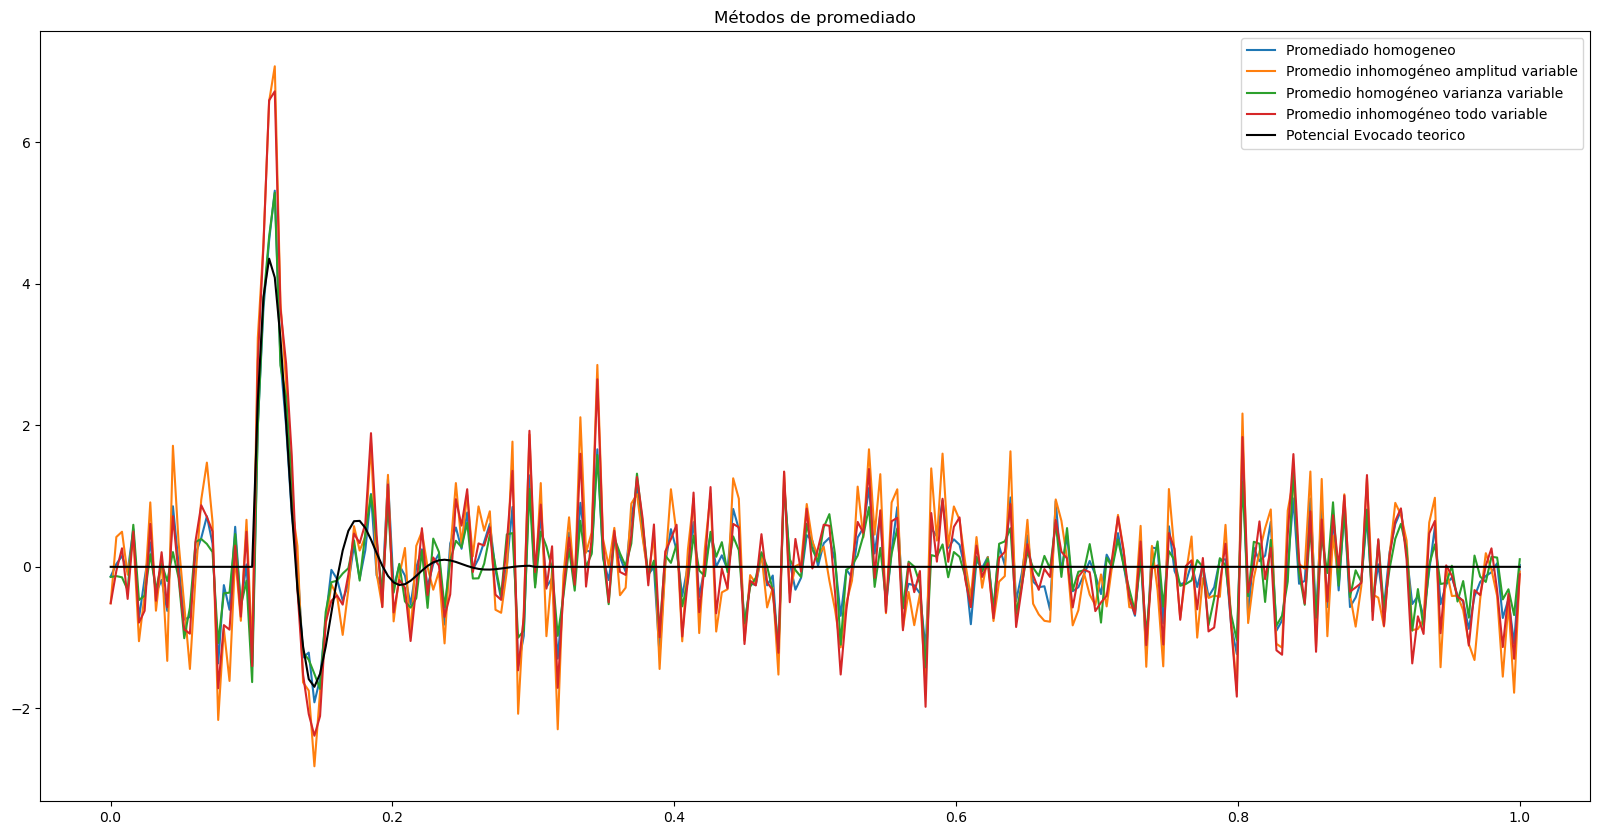

In [7]:
t_sim, X, pe = simulate_ERP(N_exp = 200, vary='both' , plotting=False)

X_mean = average_EEG(X, mode='homogenous') 
X_amp = average_EEG(X, mode='amp')
X_var = average_EEG(X, mode='var')
X_both = average_EEG(X, mode='both')

plt.figure(figsize = (20,10))
plt.plot(t_sim, X_mean, label='Promediado homogeneo')
plt.plot(t_sim, X_amp, label='Promedio inhomogéneo amplitud variable')
plt.plot(t_sim, X_var, label='Promedio homogéneo varianza variable')
plt.plot(t_sim, X_both, label='Promedio inhomogéneo todo variable')
plt.plot(t_sim, pe, color='black', label='Potencial Evocado teorico')
plt.title('Métodos de promediado')
plt.legend()
plt.show()

_Ejemplo: promediado de los datos de un archivo_

Leyendo...
Promediando...
Ploteando...


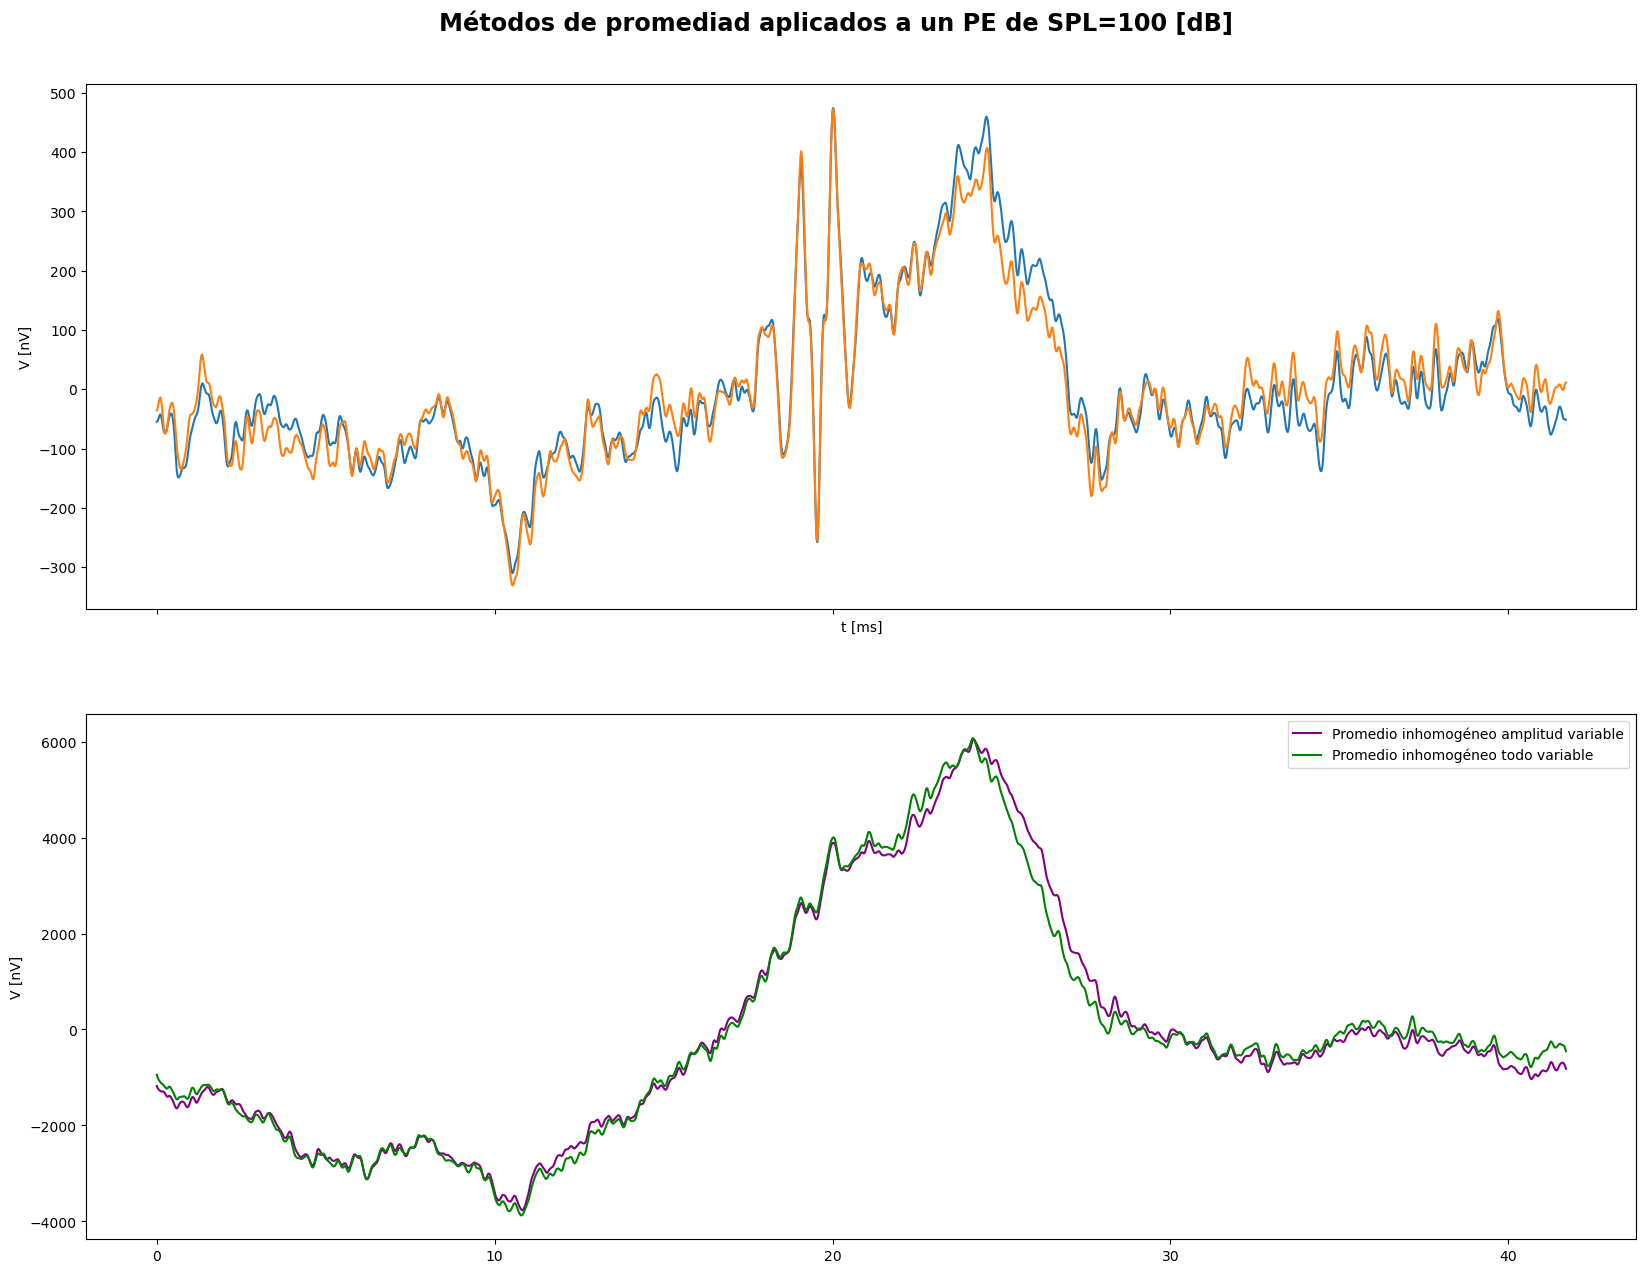

In [8]:
# Lectura
print('Leyendo...')
path_realizacion = r'data_raw_N1\N1_evoked_raw_100_F1_R1'
fs, trials, comments = read_trials(path_realizacion)

# Promediado
print('Promediando...')
tr_len = comments['Trial Length (samples)']
t = np.linspace(0, tr_len/fs, tr_len)*1000 # convert to ms
trials_mean = average_EEG(trials, mode='homogenous') 
trials_amp = average_EEG(trials, mode='amp')
trials_var = average_EEG(trials, mode='var')
trials_both = average_EEG(trials, mode='both')

# Ploteo
print('Ploteando...')
fig, axs = plt.subplots(2, 1, figsize = (20,15), sharex=True)
axs[0].set_xlabel('t [ms]')
axs[0].set_ylabel('V [nV]')
axs[1].set_ylabel('V [nV]')
axs[0].plot(t, trials_mean, label='Promediado homogeneo')
axs[0].plot(t, trials_var, label='Promedio homogéneo varianza variable')
axs[1].plot(t, trials_amp, color='purple', label='Promedio inhomogéneo amplitud variable')
axs[1].plot(t, trials_both, color='green', label='Promedio inhomogéneo todo variable')
fig.suptitle('Métodos de promediad aplicados a un PE de SPL=100 [dB]', 
             fontsize='xx-large', fontweight='semibold', y=0.93)

plt.legend()
plt.show()

Para realizar el trabajo se decidió utilizar al sujeto N1 del dataset. Lo que buscamos en un comienzo, con el fin de facilitar los posteriores análisis, es automatizar el promesamiento y análisis de grandes conjuntos de datos de EEG. Se realizó un procesamiento de archivos de datos de EEG, se calculó el promedio de la señales con los cuatro modos mencionados y se guardaron los resultados en archivos en formato CSV. De esta manera, se leyeron y promediaron las señales del sujeto N1 con estímulos de frecuencia F1 para un barrido de intensidad de sonido en SPL variando entre 10 y 100 [dB], con un paso de 5[dB]. Cada .csv se generó utilizando un método específico de promediado (existen 4 archivos .csv), y cada columna de cada uno se corresponde con una intensidad de estímulo (hay 18 columnas por cada archivo).

El archivo get\_avg\_N1.py se encarga de esto, leyendo los datos en los archivos en la carpeta data\_raw\_N1 y almacenando los .csv en data\_avg\_N1. Luego, utilizando pandas, se puede acceder a estos datos promediados sin tener que volver a calcularlos.

_Ejemplo: lectura de los promedios homogéneos_

In [9]:
directory = 'data_avg_N1'
df_homo = pd.read_csv(rf'{directory}/promedios_homo.csv')
print(f'Barrido de intensidades: {[int(col) for col in df_homo.columns]} [dB]')
df_homo.head(10)

Barrido de intensidades: [100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10] [dB]


,100,95,90,85,80,75,70,65,60,55,50,45,40,35,30,25,20,15,10
0,-54.854904,-98.351438,-191.642143,-43.549409,-70.278801,8.630937,-24.131274,15.800800,125.390390,54.478001,22.517024,124.680280,74.921244,162.591039,-26.647488,593.587799,48.976206,49.228742,-199.316183
1,-53.886842,-101.191105,-190.711298,-42.942592,-51.337872,2.238741,-28.915111,17.668382,130.827531,51.956472,20.955796,108.673844,89.820656,166.130251,-29.123164,579.608240,57.622853,33.787319,-196.691391
2,-50.669805,-103.341475,-184.766851,-42.329884,-31.978651,-2.462615,-34.305764,16.560794,133.357394,48.480531,19.565420,93.455835,103.683177,168.594110,-32.502846,570.319191,63.005279,19.300306,-192.862695
3,-47.269781,-105.692153,-174.362596,-43.219489,-15.624057,-5.166779,-40.144166,12.972916,133.221760,45.063505,17.933496,79.468046,112.585120,170.408030,-39.173581,564.867832,61.994464,6.097624,-187.564116
4,-43.722186,-108.631974,-161.372005,-47.679297,-4.636551,-6.910641,-46.330161,6.828161,130.532675,41.404930,16.437074,66.479384,115.772380,172.269218,-48.780857,563.178914,55.053969,-5.290499,-181.383606
5,-42.441274,-110.381727,-146.867318,-55.785897,1.814559,-8.984422,-51.732597,-1.384485,124.505822,35.896449,14.581275,54.313133,113.898907,173.899973,-59.061706,564.583558,43.001457,-14.162984,-175.077107
6,-44.949973,-108.254923,-132.527591,-66.891232,5.349413,-10.192164,-54.042036,-13.691670,113.832041,28.714802,11.105335,43.846080,108.278489,176.103857,-68.060403,568.312556,29.088274,-20.030843,-168.812604
7,-50.728833,-103.406281,-119.448629,-80.954062,7.110949,-9.167056,-52.003603,-27.954809,99.867669,20.089757,5.850184,34.717993,101.703659,178.455453,-74.737047,573.897690,16.327548,-23.135624,-161.974146
8,-58.662223,-97.261525,-108.726237,-94.516121,10.009530,-3.181369,-46.218224,-41.351908,83.915969,12.696020,-0.435965,28.539713,94.981544,181.338818,-79.989734,580.703528,6.296665,-22.947098,-152.433903
9,-66.265055,-92.401100,-100.761031,-105.480062,14.398641,8.100709,-37.881859,-51.426243,69.414959,8.230320,-5.420110,25.984121,89.914919,181.474714,-82.252702,588.228411,-0.090136,-20.089757,-141.192795


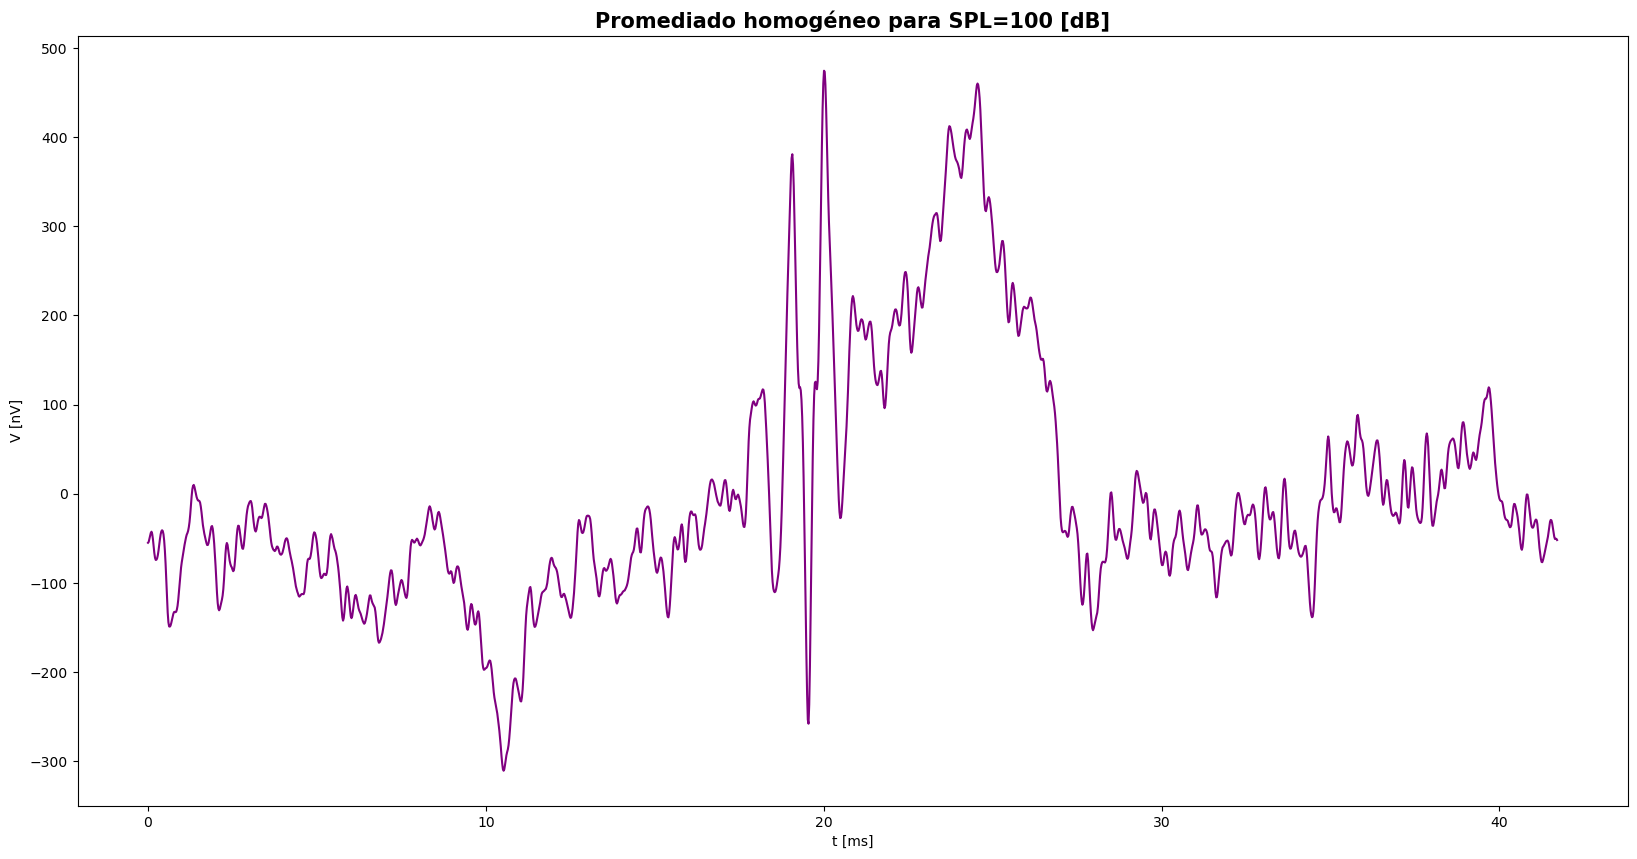

In [10]:
# Ploteamos el promedio a SPL=100 [dB]
sig_avg = df_homo['100']
t = np.linspace(0, tr_len/fs, tr_len)*1000 

plt.figure(figsize=(20, 10))
plt.plot(t, sig_avg, color='purple')
plt.xlabel('t [ms]')
plt.ylabel('V [nV]')
plt.title('Promediado homogéneo para SPL=100 [dB]', fontweight='bold', fontsize=15)
plt.show()

#### Paso 3: estimación de la LG

Una vez que se obtuvieron los promedios, se procedió a analizar las características del PE para obtener una medida objetiva de la LG. Para ello, se aplicaron dos métodos

**3.1: waveVamp**

El método waveVamp consiste en analizar la latencia de la onda V del potencial evocado a lo largo de las diferentes intensidades. La hipótesis es que esta latencia disminuye según aumenta la SPL, y el inverso de la latencia depende de la intensidad del estímulo en forma exponencial.

Para implementar este método, el módulo waveVamp cuenta con las funciones para:
1. Encontrar la onda V en el PE de la SPL más alta, con find_index_peak()
2. Seguir la onda V en los PE de las SPL inferiores, con trace_peak()

Para realizar el paso 2., se toma como referencia para cada intensidad el pico hallado en la SPL inmediatamente mayor, y se busca el máximo local en una vecindad del mismo (con un ancho a izquierda y derecha predefinido). Una vez obtenidas las latencias, se grafican en función de la SPL, y se realiza una regresión exponencial.

In [11]:
from waveVamp import *

In [12]:
# El código completo se encuentra en waveVamp.py, y debido a su
# extensión mostraremos solamente una demo de las funciones y sus docstrings
# simplemente para para explicar qué parámetros toman y qué valores devuelven

def find_index_peak_DEMO(t_arr: np.ndarray, 
                         signal: np.ndarray, 
                         t_min: int, 
                         t_max: int,
                         take_abs: bool=False,
                         plot: bool=True,
                         type_str: str='') -> Tuple[int, float]:
    """
    Finds the largest amplitude of a signal within t_min < t < t_max

    Args:
        t_arr (np.ndarray): time array
        signal (np.ndarray): signal array
        t_min (int): initial time to analyze
        t_max (int): final time to analyze
        take_abs (bool): indicates whether or not to analyze the 
        plot (bool, optional):. Defaults to True.
        type_str (str, optional): Indicates how the data was averaged

    Returns:
        tuple[int, float]: idx_peak (time index of found peak), amplitude (max - min in segment)
    """
    # CODIGO COMPLETO EN waveVamp.py
    idx_peak, amp_peak = ..., ...
    return idx_peak, amp_peak


def trace_peak_DEMO(t_arr: np.ndarray,
                    signal_df: pd.DataFrame,
                    init_idx: int, 
                    left_interval: float=0.5,
                    right_interval: float=1.0,
                    plot: bool=False) -> Tuple[List[int], List[int]]:
    """
    Finds relative maxima on a sequence of signals by tracking
    an initial peak as it moves in latency
    Args:
        t_arr (np.ndarray): time array
        signal_mat (np.ndarray): 2D array where each row is a time series
        init_idx (int): initial time seed to look ar
        left_interval (float): Start of time interval relative (negatively) to an index
        right_interval (float): Start of time interval relative (positively) to an index
        plot (bool, optional):. Defaults to True.
    Returns:
        List[int]: List of indeces where the peak happens
    """
    # CODIGO COMPLETO EN waveVamp.py
    idx_peak_list, amp_peak_list = ..., ...
    return idx_peak_list, amp_peak_list


def waveV_LG_estimation(df: pd.DataFrame,
                        t: np.ndarray,
                        output_dir: str,
                        prom_type: str='') -> None:
    """
    Estimates loudness growth on a subject by analizyng the decaying latency
    of the wave V peak in a series of ERP measured at different SPL levels

    Args:
        df (pd.DataFrame): Each column is a series of time samples of an ERP signal 
        for a given SPL, where the SPL level is itself the column name
        t: time samples array, in miliseconds
        outputdir: directory to save the figures
        prom_type (str): Indicates how the data was averaged

    returns: nothing, but it plots
    """
     # Find first peak
    first_avg = df['100']
    idx_peak_wave5, peak_amp = find_index_peak(t, first_avg, 5, 10, 
                                                take_abs=False, plot=True, type_str=prom_type)

    # get remaining signals and trace the peak location
    check_columns = df.columns[1:]
    mat_to_trace  = df[check_columns]

    # trace
    peak_indeces, peak_amps = trace_peak(t, mat_to_trace, idx_peak_wave5, 
                                            left_interval=0.5, right_interval=2.5, plot=True)

    # merge with the data from the original signal, and sort
    columns_arr = np.array([int(col) for col in df.columns])
    sort_idx = columns_arr.argsort()
    columns_arr = columns_arr[sort_idx]

    # define our estimate
    peak_indeces = np.array([idx_peak_wave5] + peak_indeces)
    peak_indeces = peak_indeces[sort_idx]
    est_LG = 1/peak_indeces
    est_LG /= est_LG.max()

    # regression
    _, reg_LG = exponential_regression(columns_arr, est_LG)

    # plot
    fig, ax = plt.subplots()
    ax.plot(columns_arr, est_LG, label='LG')
    ax.plot(columns_arr, reg_LG, label='Reg. exponencial')
    ax.set_xlabel('SPL [dB]')
    ax.set_ylabel('LG [uu. aa.]')
    ax.set_xticks(columns_arr)
    ax.set_title(f"Percepción estimada con promediado {prom_type}")
    plt.legend()
    plt.show()

    fig.savefig(rf"{output_dir}/est_LG_{prom_type}.png")
    plt.close()

_Ejemplo: estimación de la LG con promediado por amplitud_

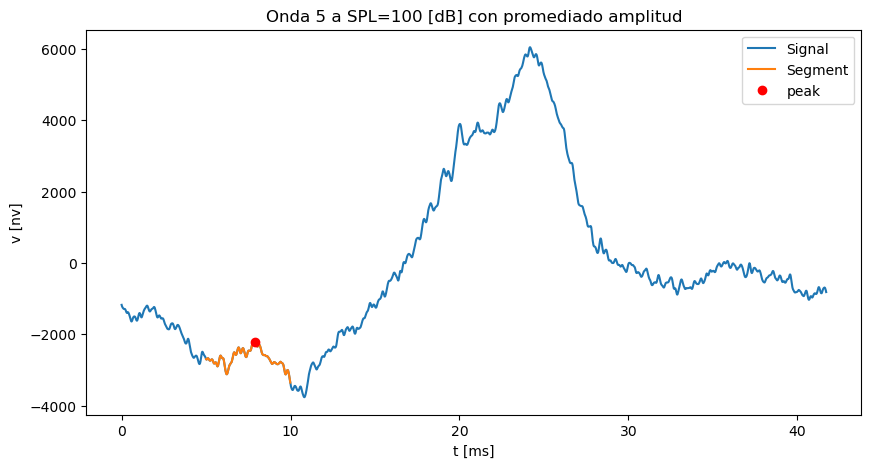

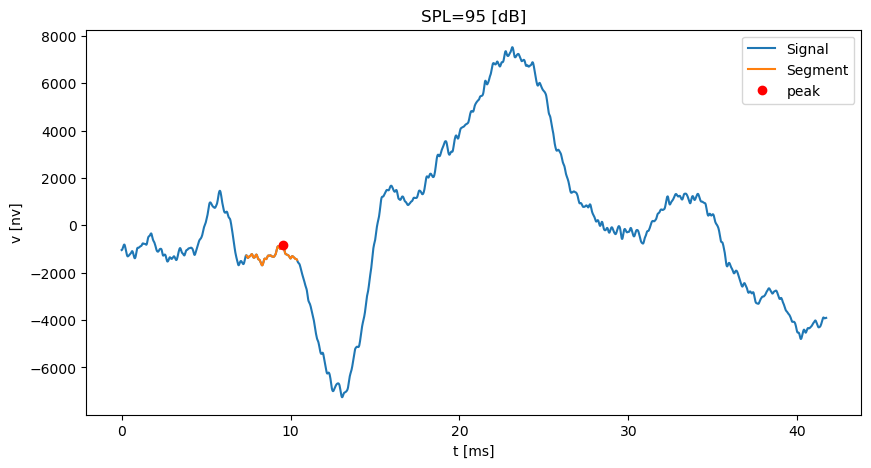

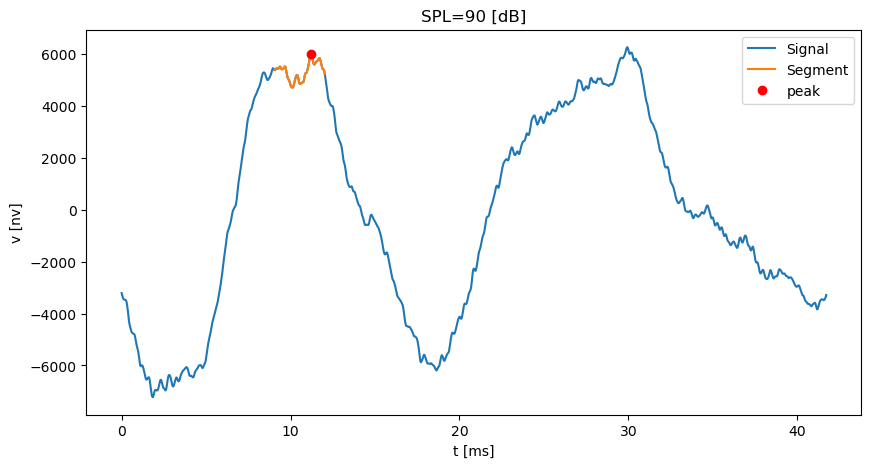

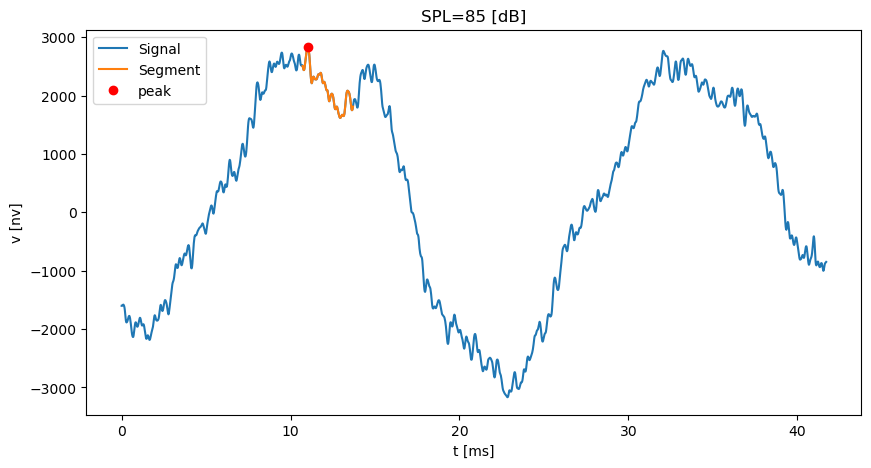

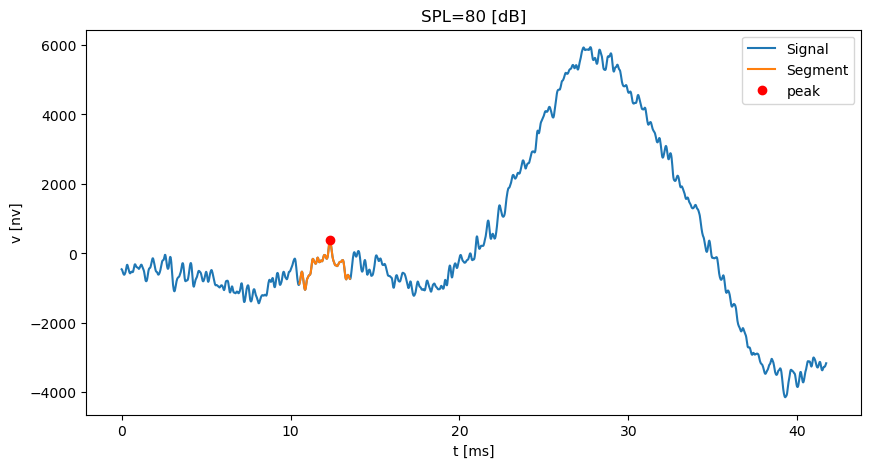

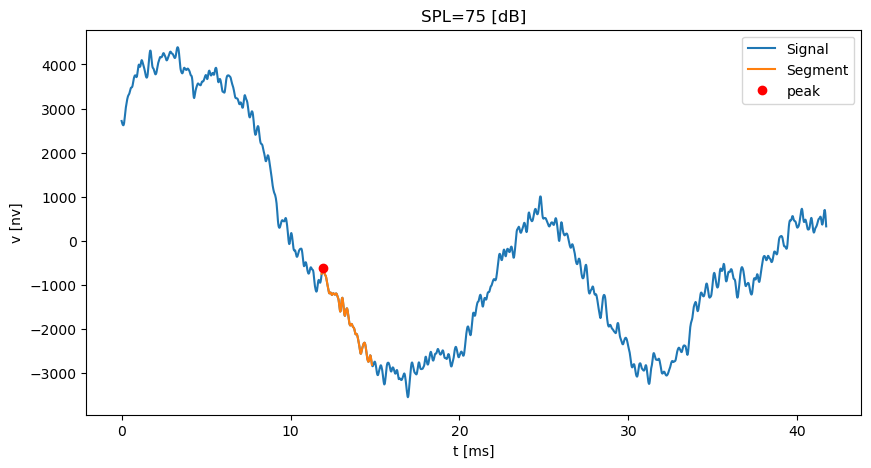

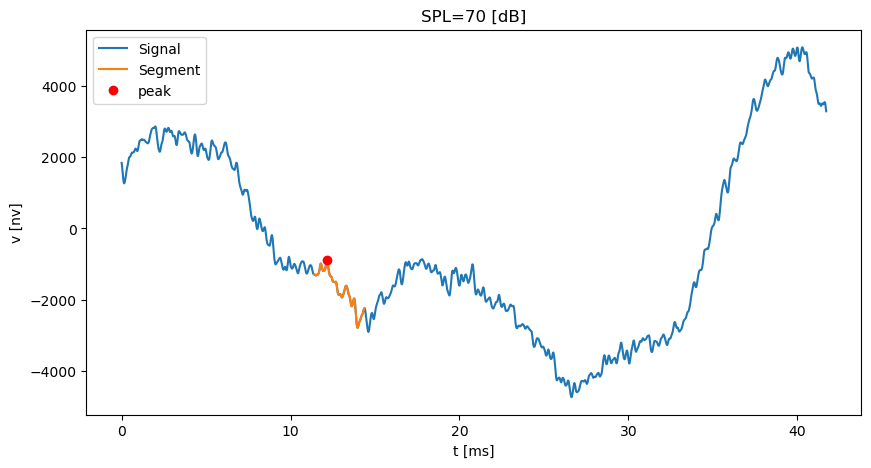

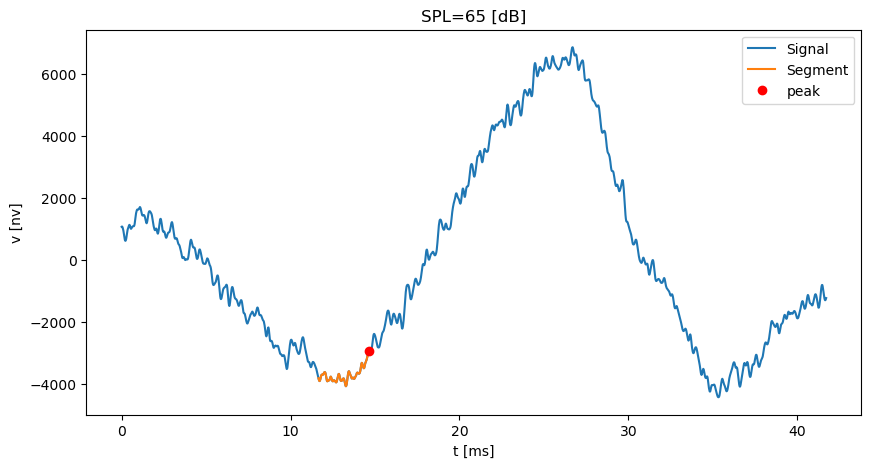

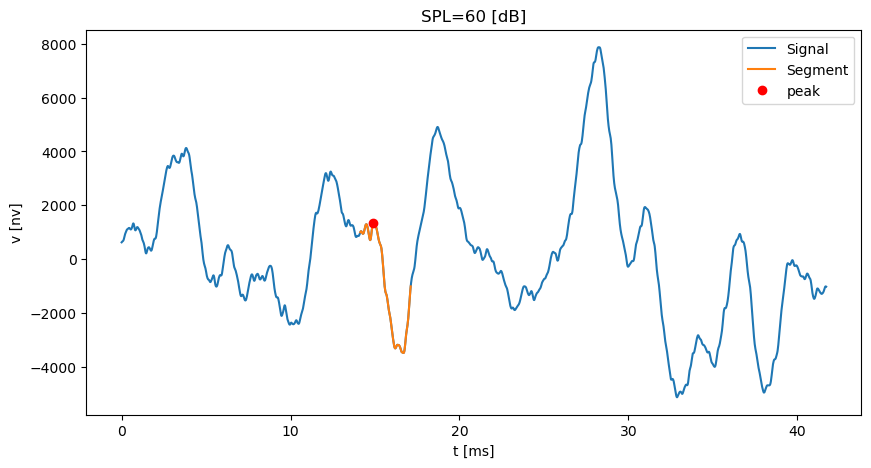

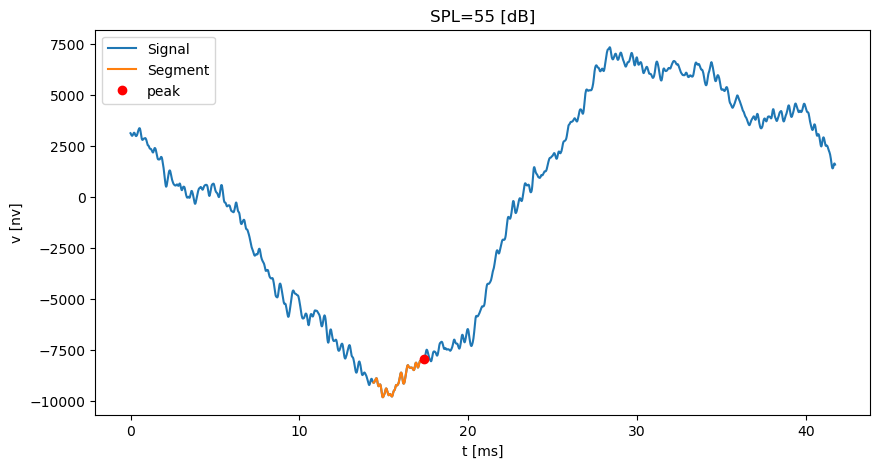

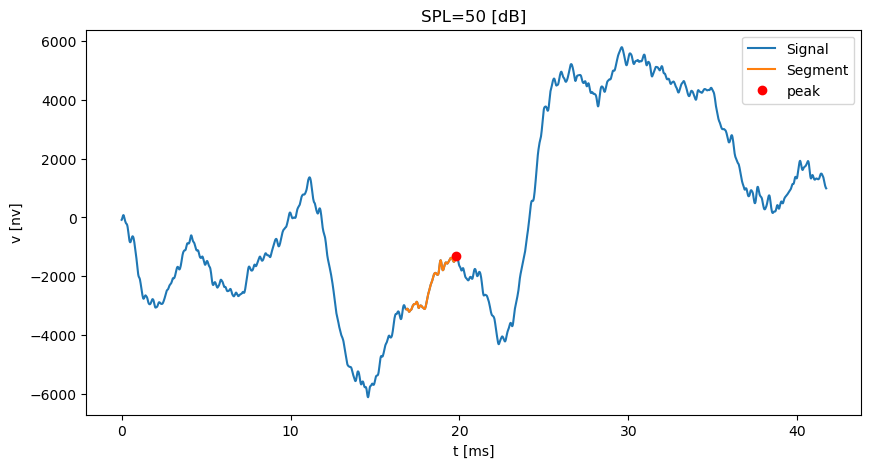

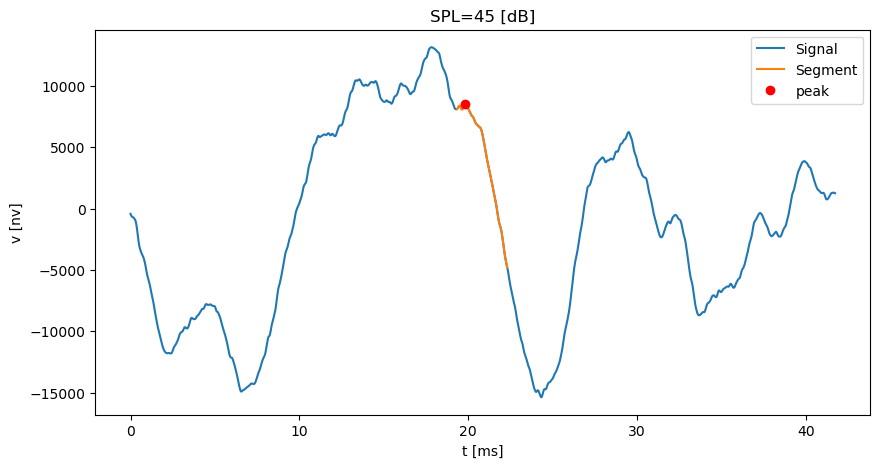

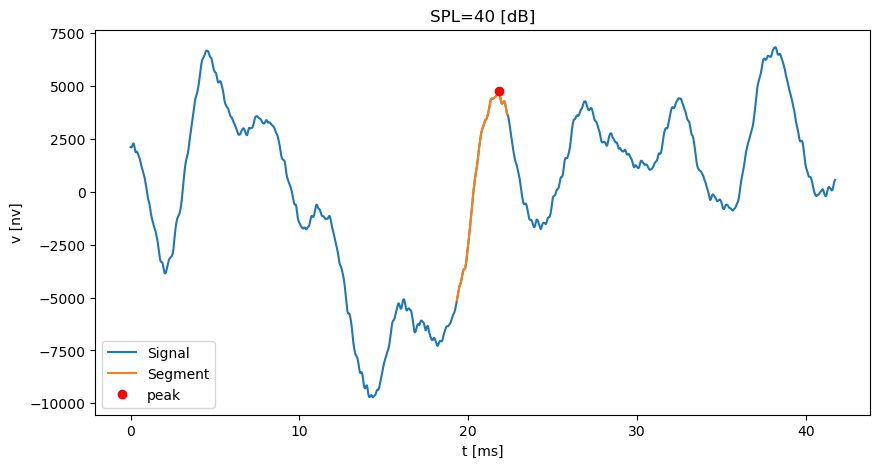

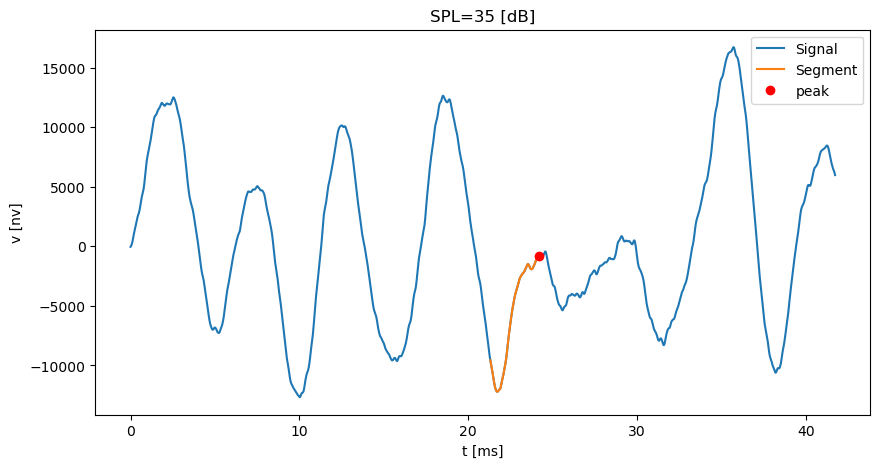

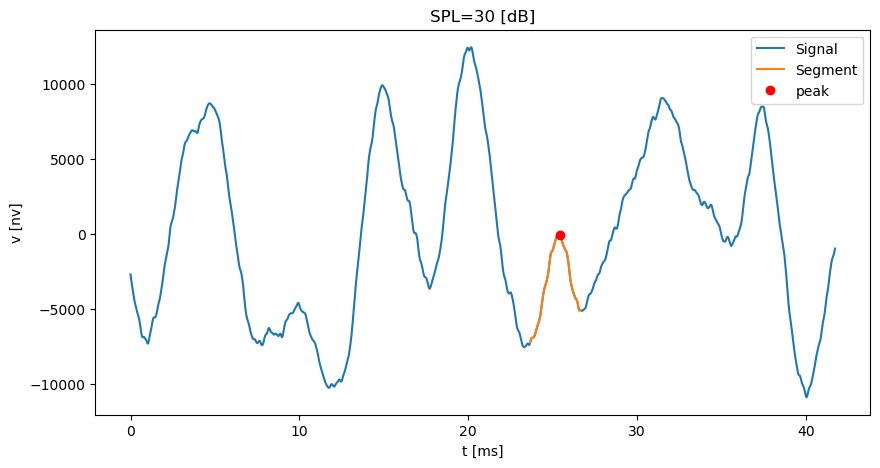

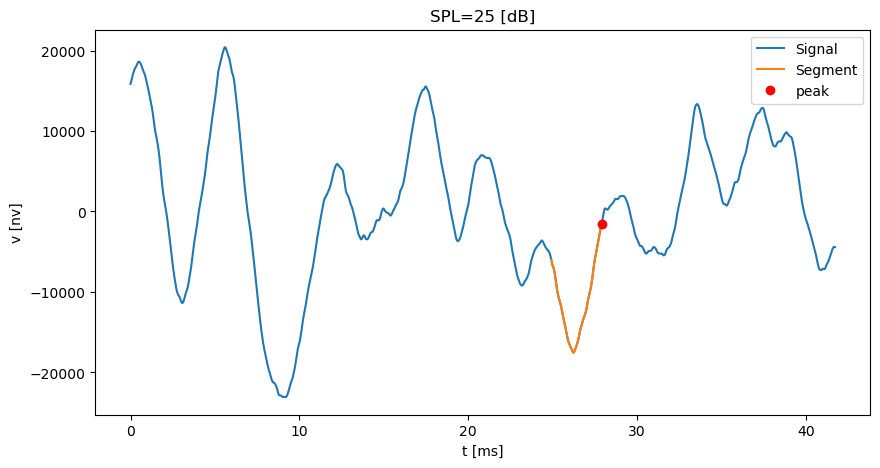

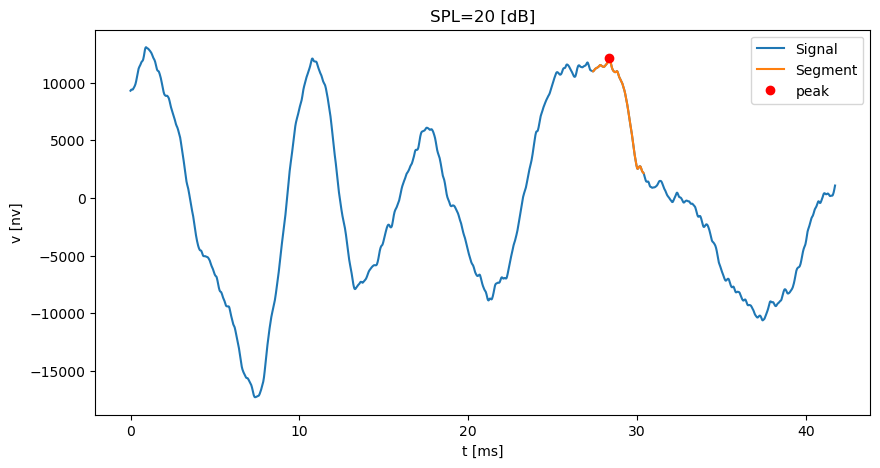

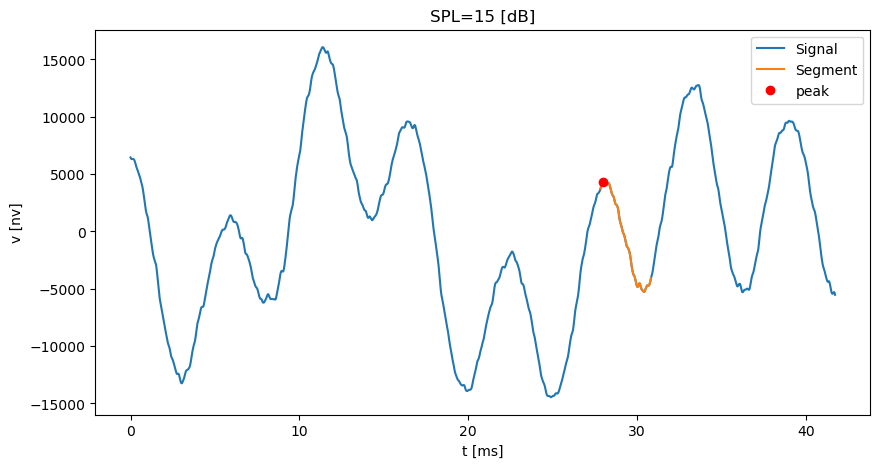

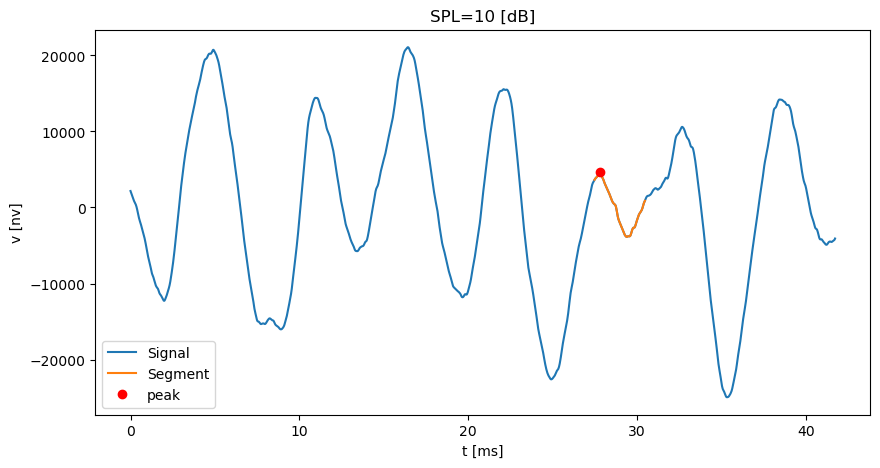

[ 0.01440839 -1.55027182]


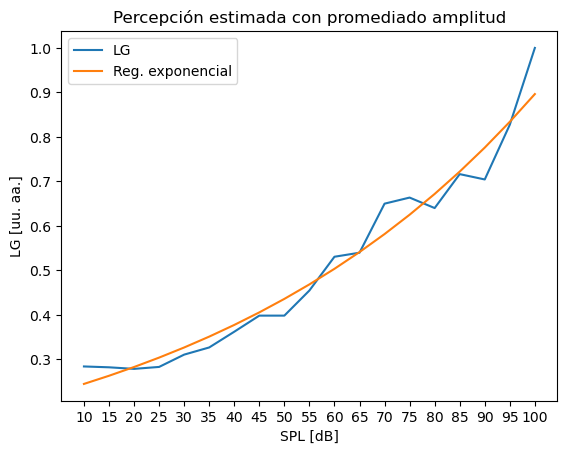

In [13]:
directory = f'data_avg_N1'
df_amp = pd.read_csv(rf'{directory}/promedios_amp.csv')
t = np.linspace(0, tr_len/fs, tr_len)*1000 
waveV_LG_estimation(df_amp, t, output_dir='imagenes_ejemplo', prom_type='amplitud')

A continuación, los resultados de las estimaciones para cada método de promediado:

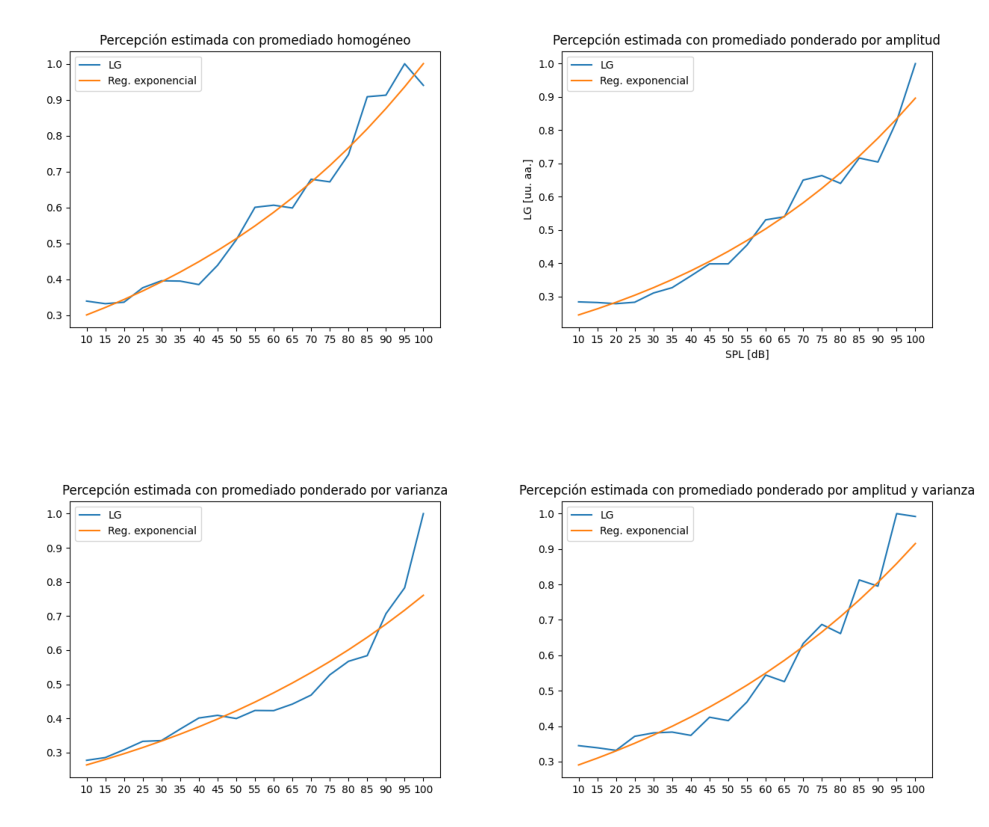

In [33]:
img_dir = r"estimaciones_LG_waveV"
names = ['homogéneo', 'ponderado por amplitud', 'ponderado por varianza', 'ponderado por amplitud y varianza']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, name in enumerate(names):
    img = plt.imread(rf"{img_dir}/est_LG_{name}.png")
    axs[i//2, i%2].imshow(img)
    axs[i//2, i%2].axis('off')

plt.tight_layout()
plt.show()


#### 3.2:Estimación por PSD

El método a desarrollar consiste en 

1. Hallar la PSD (Densidad Espectral de Potencia) para cada amplitud con su respectivo método de promediado. 

2. Integrar cada resultado, tomar el inverso, y normalizar por el valor más alto

Los métodos para estimar la PSD serán, el periodograma y el metodo de Welch.El periodograma implica calcular la transformada discreta de Fourier de la señal usando la FFF y luego realizarle el módulo al cuadrado del mismo dividido por la cantidad de muestras.E l método de Welch, usa como base la idea del periodograma, pero a diferencia de este realiza la FFT por ventanas de tiempo, estas mismas tambien tienen cierto grado de solapamiento para evitar las perdidas de información en los bordes al aplicarle a cada ventana temporal una window (usualmente la de Hann). Para luego realizar el promedio del resultado dado para cada ventana, de esta forma se logra una transformada más suavizada.


In [14]:
from welch import *

Dentro de los parámetros para utilizar la función Welch del módulo signal de scipy se encuentran
- El tipo de ventana 
- La Fs 
- La cantidad de ventanas temporales 
- Cuanto se superponen las ventanas

La Fs está marcada por la base de datos en 48000 Hz. El tipo de ventana a elegir fue la ventana de Hann que es el modo predilecto de la función, esto ya que se evaluó que el tipo de ventana no afecta a gran escala los datos. A su vez el grado de solapamiento se tiene en 50%, esto ya que se busca que se pierda la menor cantidad de información por efectos de borde. La cuestión que más peso tiene a la hora de realizar el método de Welch es la elección de cuantas ventanas se van a tomar. Esto es porque a mayor grado de ventanas se va a tener una función mas suavizada, pero como se estan dejando pocos puntos temporales la FFT es de menor resolución. Por ello se realizaron varias comparaciones con el periodograma para dar con una cantidad de ventanas que lo suavice, pero no pierda mucha resolución. Para esto se toma como ejemplo el valor de amplitud 100 del promedio homogéneo.


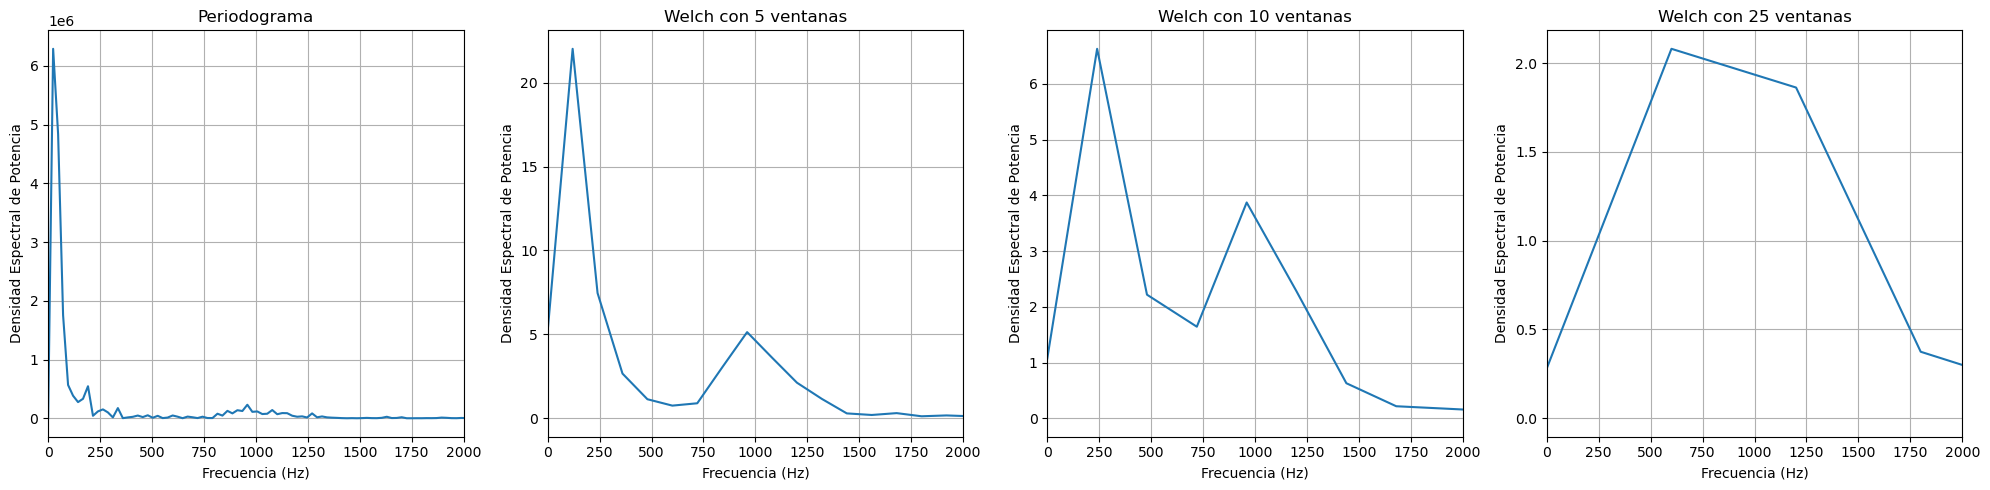

In [15]:

# cargo la data
path = r'data_avg_N1\promedios_homo.csv'
df = pd.read_csv(path)
spl_100 = df['100']
fs = 48000
N = len(spl_100)

# Periodograma
periodograma = np.abs(np.fft.fft(spl_100))**2 / N
# Frecs del periodograma
w = np.fft.fftfreq(N, 1/fs)

# valores de nper
nper_values = [5, 10, 25]

# Set up subplots
fig, axs = plt.subplots(1, len(nper_values) + 1, figsize=(20, 5))

# Plot periodograma
axs[0].set_xlim(0, 2000)
axs[0].plot(w[:N // 2], periodograma[:N // 2])
axs[0].set_title('Periodograma')
axs[0].set_xlabel('Frecuencia (Hz)')
axs[0].set_ylabel('Densidad Espectral de Potencia')
axs[0].grid(True)

# Loop over sobre valores y Welch
for i, nper_factor in enumerate(nper_values):
    nper = int(len(spl_100) // nper_factor)
    f, Pxx_den = welch(spl_100, fs, noverlap=nper // 2, nperseg=nper)
    
    axs[i + 1].set_xlim(0, 2000)
    #Se limita el eje x ya que no hay frecuencias notables mayorres a 2000 hz
    axs[i + 1].plot(f, Pxx_den)
    axs[i + 1].set_title(f'Welch con {nper_factor} ventanas')
    axs[i + 1].set_xlabel('Frecuencia (Hz)')
    axs[i + 1].set_ylabel('Densidad Espectral de Potencia')
    axs[i + 1].grid(True)

# Show plot
plt.tight_layout()
plt.show()

Como se puede observar si se realizan varias ventanas se pierde totalmente la forma original del periodograma.Esto se debe a lo mencionado anteriormente sobre la resolución de la FFT. A su vez cabe destacar que la señal es de muy poca longitud temporal, del orden de los 40 Ms, lo cual se compensa con una alta frecuencia de muestreo. Según lo visto ,y debido al poco rango temporal de la señal original, se deciden hacer 5 ventanas.

In [22]:
#genero una funcion que dado un path a un csv me devuelve la suma del welch para cada header
def suma_welch_peri(path,
                    fs: int = 48000,
                    plot: bool = False):

    #cargo la data
    df = pd.read_csv(path)
    headers = df.columns.values.tolist()
    n = len(headers)

    #genero una matriz para almacenar la data

    PSD_sum_mat_welch = np.zeros((n,2))
    PSD_sum_mat_Periodograma = np.zeros((n,2))

    for  i in range(n):
        #  Welch's 
        spl = df[headers[i]]
        N = len(spl)
        nper = int(len(spl) // 5)
        ## se decide hacer 5 ventanas e manera empirica ya que se realizaron varios tests y es el que mas suavisa al periodograma sin tener errores por promediacion 
        ##el overlap es el clasico del 50% ya que se considera que es el que da mejores resultados
        f, Pxx_den = welch(spl, fs, noverlap=nper//2, nperseg=nper)

        #se realiza la integral
        suma_PSD = sum(Pxx_den)
        #se almacenan los datos
        PSD_sum_mat_welch[i,0] = int(headers[i])
        PSD_sum_mat_welch[i,1] = 1/suma_PSD
    

        # Periodograma
        periodograma = np.abs(np.fft.fft(spl))**2 /N
        # Frecs del periodograma
        w = np.fft.fftfreq(N, 1/fs)
         #se realiza la integral
        suma_PSD_Peri = sum(periodograma)
        #se almacenan los datos
        PSD_sum_mat_Periodograma[i,0] = int(headers[i])
        PSD_sum_mat_Periodograma[i,1] = 1/suma_PSD_Peri
        
    
    #normalizo por el valor mas alto
    max_per_col_welch = np.max(PSD_sum_mat_welch,axis=0)
    max_welch = max_per_col_welch[1]

    max_per_col_peri = np.max(PSD_sum_mat_Periodograma,axis = 0)
    max_peri = max_per_col_peri[1]

    for i in range(n):  
        PSD_sum_mat_welch[i,1] = PSD_sum_mat_welch[i,1]/max_welch
        PSD_sum_mat_Periodograma[i,1] = PSD_sum_mat_Periodograma[i,1]/max_peri
    
    

    return PSD_sum_mat_welch,PSD_sum_mat_Periodograma


def graf_intensidad_vs_welch_suma(mat: np.array, metodo: str,modo: str = 'welch'):
    
    # extraigo las intencidades y las sumas
    intensity = mat[:, 0]
    
    suma = (mat[:, 1])
    

    # Plot
    plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
    if modo == 'welch':
        plt.plot(intensity, suma, marker='o', linestyle='-', color='b', label=r'$\hat{LG}$ con Welch')
    else:
        plt.plot(intensity, suma, marker='o', linestyle='-', color='r', label=r'$\hat{LG}$ con Periodograma')
    _, LG_exp = exponential_regression(intensity, suma)
    plt.plot(intensity, LG_exp, 'g--', label='Regresión exponencial')

    # Add labels and title
    plt.xlabel('Intensidad')
    if modo == 'welch':
        plt.ylabel('sumas de Welch')
    else:
        plt.ylabel('sumas de Periodograma')

    plt.title(f"Promediado {metodo}")

    # Add grid
    plt.grid(True)

    # Add legend
    plt.legend()

    # Show plot
    plt.show()




Se procede a implementar el método:

[ 0.05575737 -5.30449021]


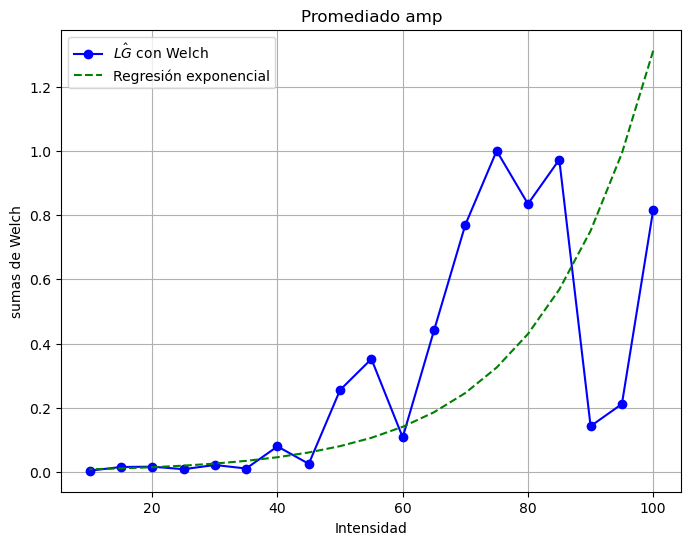

[ 0.03321954 -3.55322351]


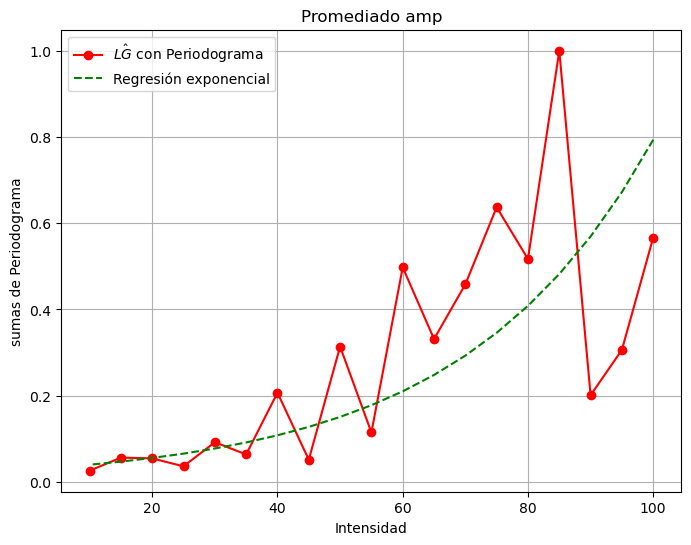

[ 0.05651632 -5.29046587]


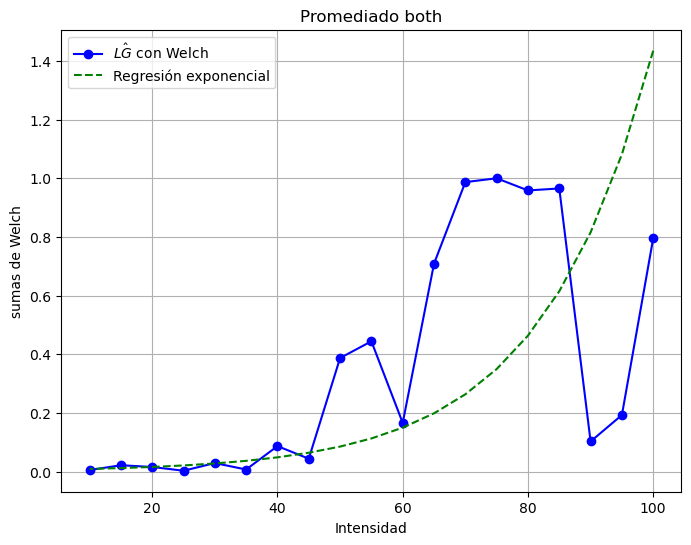

[ 0.03420274 -3.62824716]


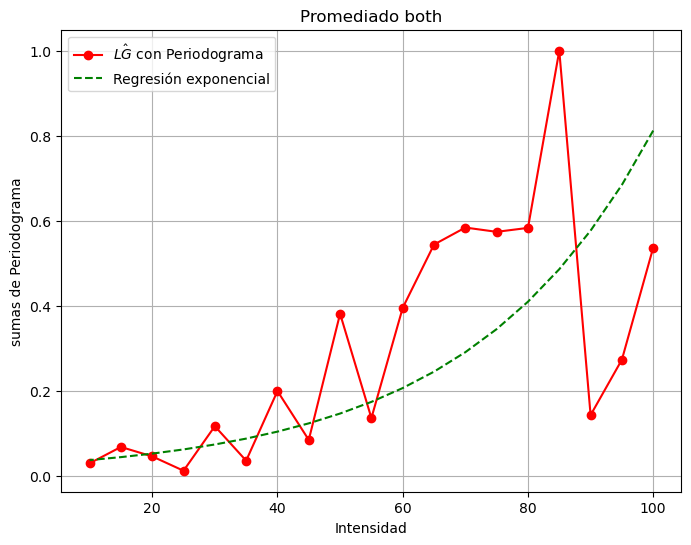

[ 0.02517248 -3.12544377]


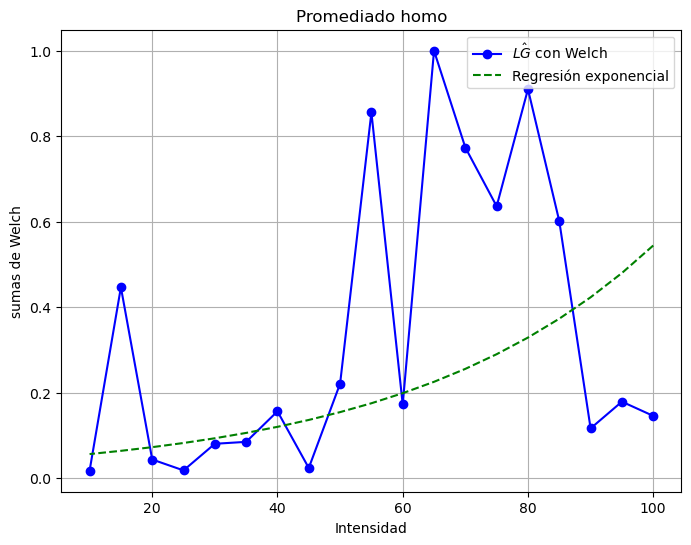

[ 0.01860561 -3.06226164]


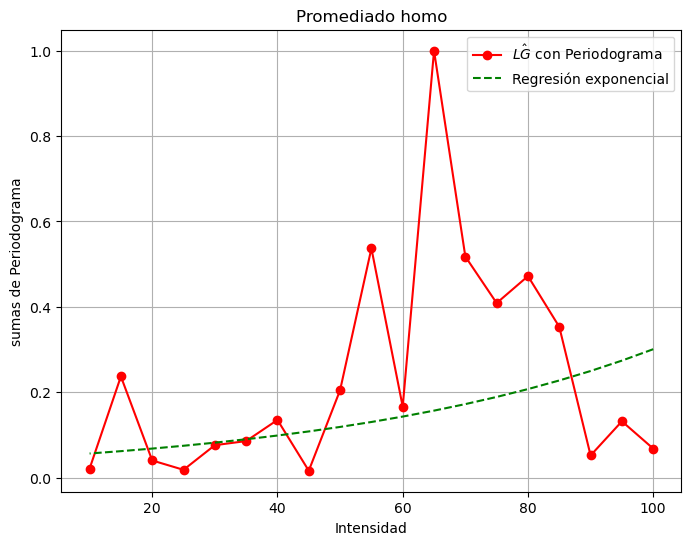

[ 0.02093733 -2.66944621]


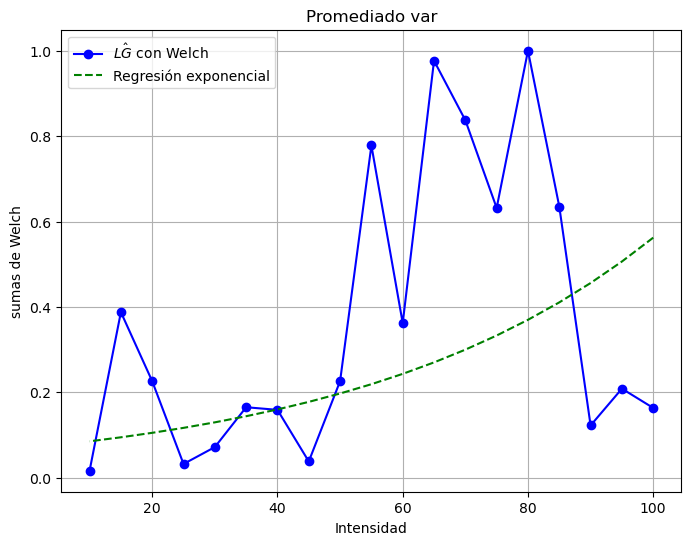

[ 0.01792873 -2.87755774]


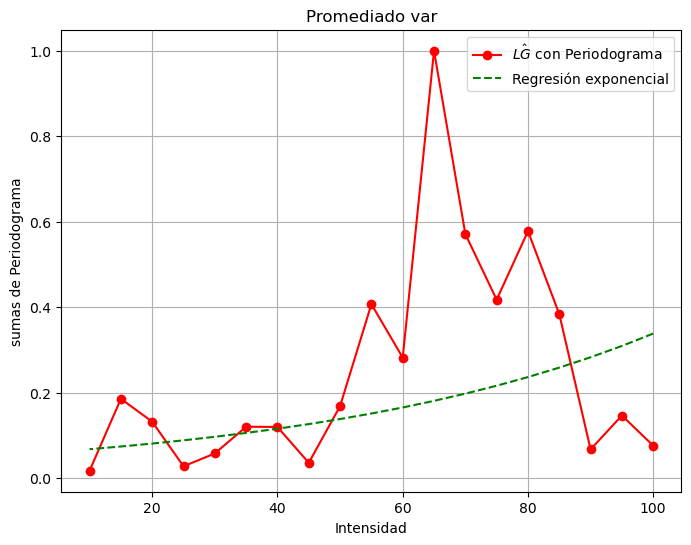

In [23]:
#fs de las realizaciones
fs = 48000
lista_paths=[]
directory = os.fsencode('data_avg_N1')
for file in os.listdir(directory):
        filename = os.fsdecode(file)        
        filepath = os.path.join(directory, os.fsencode(filename))
        name = os.fsdecode(filepath)
        lista_paths.append(name)
        
    # calculo la suma del welch
PSD_sum_mat_amp= suma_welch_peri(lista_paths[0])
PSD_sum_mat_both= suma_welch_peri(lista_paths[1])
PSD_sum_mat_homo= suma_welch_peri(lista_paths[2])
PSD_sum_mat_var= suma_welch_peri(lista_paths[3])

#almaceno las matrices 
matrices_suma = {"amp":PSD_sum_mat_amp,"both":PSD_sum_mat_both,"homo":PSD_sum_mat_homo,"var":PSD_sum_mat_var}
for key, value in matrices_suma.items():
    PSD_welch, PSD_peri = value
    graf_intensidad_vs_welch_suma(PSD_welch, key,modo = 'welch')
    graf_intensidad_vs_welch_suma(PSD_peri, key,modo = 'periodogrma') 

Como puede verse en los gráficos, se obtiene en todos los casos una curva aproximadamente exponencial monótona creciente. Este efecto es más marcado cuando se aplica un promediado por amplitud.








---

### Discusión
Tras analizar cualitativa y cuantitativamente los resultados, llegamos a las siguientes conclusiones:
- Los métodos de promediado ponderado por amplitud (y en patircular, el método de ponderado por amplitud y varianza) producen mejores resultados respecto al análisis de la forma de onda del PE que el promediado homogéneo y el ponderado por varianza
- El inverso de la latencia de la onda V en el PE se puede modelar como una función exponencial del SPL en dB del estímulo, dando lugar a una LG monótona creciente.
- El inverso de la potencia total de la señal de PE, calculado mediante integración numérica de la PSD obtenida por periodograma o por método de Welch, tambien da lugar a un estimador monótono creciente de la LG en función del SPL del estímulo
- Para obtener resultados más determinantes, sería necesario replicar estos métodos a un mayor número de sujetos, con el fin de evaluar la variabilidad y la dependencia del individuo en la percepción



### Conclusión

Mediante este trabajo, se logró extraer una curva estimativa del PE auditivo para la estimulación de tipo TBABR. A partir del análisis de estas curvas, se pudo estimar una aproximación objetiva a la percepción sonora de un sujeto. Estos métodos, de aplicarse en un número más grande de sujetos, podrían ser de gran utilidad para evaluar la integridad funcional de las vías auditivas, al dar con un estimador de la LG de una persona independientemente de su subjetividad.

---

### Referencias

[1] Da Silva, I. G. Araujo, "Objective estimation of loudness growth using tone burst evoked auditory responses," Ph.D. dissertation, Northeastern University, 2009. [Online]. Available: http://hdl.handle.net/2047/d20000027. [Accessed: Jun. 25, 2024].

[2] "Potenciales evocados. Pruebas diagnósticas. Clínica Universidad de Navarra," Clinica Universidad de Navarra. [Online]. Available: https://www.cun.es/enfermedades-tratamientos/pruebas-diagnosticas/potenciales-evocados. [Accessed: Jun. 25, 2024].

[3] A. L. Goldberger et al., "PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals," Circulation [Online], vol. 101, no. 23, pp. e215-e220, 2000.

[4] "Potenciales evocados auditivos. Clínica Barona y asociados," Clinica Barona y asociados. [Online]. Available: https://clinicabarona.com/potenciales-evocados-auditivos/. [Accessed: Jun. 25, 2024]

[5] Germán Trinidad, Gabriel Trinidad, Eduardo de la Cruz, "Potenciales evocados auditivos," [Online], vol. 6, no. 5, pp. 296-301, 2008.